In [759]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Reading the data-set

In [760]:
df_housing = pd.read_csv('train.csv')

In [761]:
df_housing.shape

(1460, 81)

In [762]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [763]:
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking for number of columns with null values

In [764]:
# finding columns with null entries if any and storing the column names in a dataframe to filter only those columns with null entries 
df_temp = pd.DataFrame(round((df_housing.isnull().sum()/ len(df_housing))*100,2).sort_values(ascending = False))
df_temp[df_temp[0] > 40.00]

,0
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26


since columns 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu' have null entries greater than 40%, so dropping them from our dataset

In [765]:
# dropping the columns with null entries greater than 40%, which are 6 columns 
df_housing.drop(df_temp[df_temp[0] > 40.00].index, inplace = True, axis = 1)

In [766]:
# dropping the 'Id' column as it won't contribute to our modellling exercise, being an identifier.
df_housing.drop('Id', inplace = True, axis = 1)

In [767]:
df_housing.shape

(1460, 74)

In [768]:
df_housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Treating missing values
#### numerical columns -> Mean/Median (Median is always better approach to impute, because Median is not affected with Outlier )
#### categorical columns -> Mode is used 

In [769]:
# checking for the columns with missing entries
df_imp = pd.DataFrame(df_housing.isnull().sum().sort_values(ascending = False))
df_imp['NA_pct'] = pd.DataFrame(round((df_housing.isna().sum()/ len(df_housing))*100,2).sort_values(ascending = False))
df_imp[df_imp[0] != 0.00]

,0,NA_pct
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtQual,37,2.53
BsmtFinType1,37,2.53


In [770]:
df_housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [771]:
print('The median value of LotFrontage: ', df_housing['LotFrontage'].median())
df_housing['LotFrontage'].fillna( df_housing['LotFrontage'].median(), inplace = True)
print(df_housing['LotFrontage'].isna().sum())

The median value of LotFrontage:  69.0
0


#### NA in Dataset refers to Not Available or Not Present for Features like GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond, BsmtQual. So replacing 'NA' with 'Not Available'.

In [772]:
def fillingNA(x):
    for i in x:
        df_housing[i].fillna('Not_Avail', inplace = True)

fillingNA(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure','BsmtCond', 'BsmtQual'])


####  For GarageYrBlt , filling NA with mode of the distribution

In [773]:
df_housing['GarageYrBlt'].fillna(df_housing['GarageYrBlt'].mode()[0], inplace = True)

In [774]:
df_housing['MasVnrArea'].fillna(0, inplace = True)

In [775]:
x_check = pd.DataFrame(df_housing.isna().sum()/len(df_housing))
x_check[x_check[0] != 0.00]

,0
Electrical,0.000685


#### In Electrical column only 1 row is having 'NA' and it is an categorical column, so we can impute the mode of this column.

In [776]:
print('The mode value of Electrical: ', df_housing['Electrical'].mode()[0])
df_housing['Electrical'].fillna( df_housing['Electrical'].mode()[0], inplace = True)
print(df_housing['Electrical'].isna().sum())

The mode value of Electrical:  SBrkr
0


#### Splitting cols into categorical, numeric columns 

'YearBuilt' , 'YearRemodAdd', 'GarageYrBlt' have a wide distribution of Years, so deriving new columns with 6 Bands of 30 Years each. 
They are 1870-1899 , 1900-1929, 1930-1959, 1960-1989, 1990-2000, 2001-2010

In [777]:
def year_band(x):
    if x <= 1899:
        return '1870-1899'

    elif x >= 1900 and x <= 1929:
        return'1900-1929'
    
    elif x >= 1930 and x <= 1959:
        return'1930-1959'
    
    elif x >= 1960 and x <= 1989:
        return'1960-1989'
    
    elif x >= 1990 and x <= 2000:
        return'1990-2000'
    
    elif x >= 2001 and x <= 2010:
        return'2001-2010'


yr_list = ['YearBuilt' , 'YearRemodAdd', 'GarageYrBlt']
for i in yr_list:
    column = i+'_bnd' 
    df_housing[column] = df_housing[i].apply(lambda x : year_band(x) ) 

In [778]:
df_housing.shape

(1460, 77)

##### Dropping Columns like ('BsmtFinSF1' + 'BsmtFinSF2' +'BsmtUnfSF' = 'TotalBsmtSF' and '1stFlrSF' + '2ndFlrSF' + 'LowQualFinSF' = 'GrLivArea') which are can be inferred from Total Area Columns

In [779]:
df_housing.drop(['BsmtFinSF1' ,'BsmtFinSF2' ,'BsmtUnfSF', '1stFlrSF' , '2ndFlrSF', 'LowQualFinSF',
                 'YearBuilt' , 'YearRemodAdd', 'GarageYrBlt','MoSold'], inplace = True, axis = 1)
df_housing.shape

(1460, 67)

### mis-classified columns as Numeric Columns and Mapping the Cols to their respective categories
'MSSubClass' , 'OverallQual', 'OverallCond'

In [780]:
df_housing['MSSubClass'] = df_housing['MSSubClass'].map({ 20:'1-STORY 1946 & NEWER ALL STYLES',
        30: '1-STORY 1945 & OLDER',
        40: '1-STORY W/FINISHED ATTIC ALL AGES',
        45: '1-1/2 STORY - UNFINISHED ALL AGES',
        50:	'1-1/2 STORY FINISHED ALL AGES',
        60:	'2-STORY 1946 & NEWER',
        70:	'2-STORY 1945 & OLDER',
        75:	'2-1/2 STORY ALL AGES',
        80:	'SPLIT OR MULTI-LEVEL',
        85:	'SPLIT FOYER',
        90:	'DUPLEX - ALL STYLES AND AGES',
       120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:	'1-1/2 STORY PUD - ALL AGES',
       160:	'2-STORY PUD - 1946 & NEWER',
       180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df_housing['OverallQual'] = df_housing['OverallQual'].map({ 10:	'Very Excellent',
       9:	'Excellent',
       8:	'Very Good',
       7:	'Good',
       6:	'Above Average',
       5:	'Average',
       4:	'Below Average',
       3:	'Fair',
       2:	'Poor',
       1:	'Very Poor'})


df_housing['OverallCond'] = df_housing['OverallCond'].map({ 10:	'Very Excellent',
       9:	'Excellent',
       8:	'Very Good',
       7:	'Good',
       6:	'Above Average',
       5:	'Average',
       4:	'Below Average',
       3:	'Fair',
       2:	'Poor',
       1:	'Very Poor'})

In [781]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   object 
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   LotShape          1460 non-null   object 
 6   LandContour       1460 non-null   object 
 7   Utilities         1460 non-null   object 
 8   LotConfig         1460 non-null   object 
 9   LandSlope         1460 non-null   object 
 10  Neighborhood      1460 non-null   object 
 11  Condition1        1460 non-null   object 
 12  Condition2        1460 non-null   object 
 13  BldgType          1460 non-null   object 
 14  HouseStyle        1460 non-null   object 
 15  OverallQual       1460 non-null   object 
 16  OverallCond       1460 non-null   object 


In [782]:
# all numeric (float and int) variables in the dataset

def num_cols(df):
    housing_num = df.select_dtypes(include=['float64', 'int64'])
    print(housing_num.shape)
    return housing_num



In [783]:
num_cols(df_housing).columns

(1460, 24)


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [784]:
def cat_cols(df):
    housing_cat = df.select_dtypes(include=['object'])
    print(housing_cat.shape)
    return housing_cat

In [785]:
cat_cols(df_housing).columns

(1460, 43)


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'YearBuilt_bnd', 'YearRemodAdd_bnd', 'GarageYrBlt_bnd'],
      dtype='object')

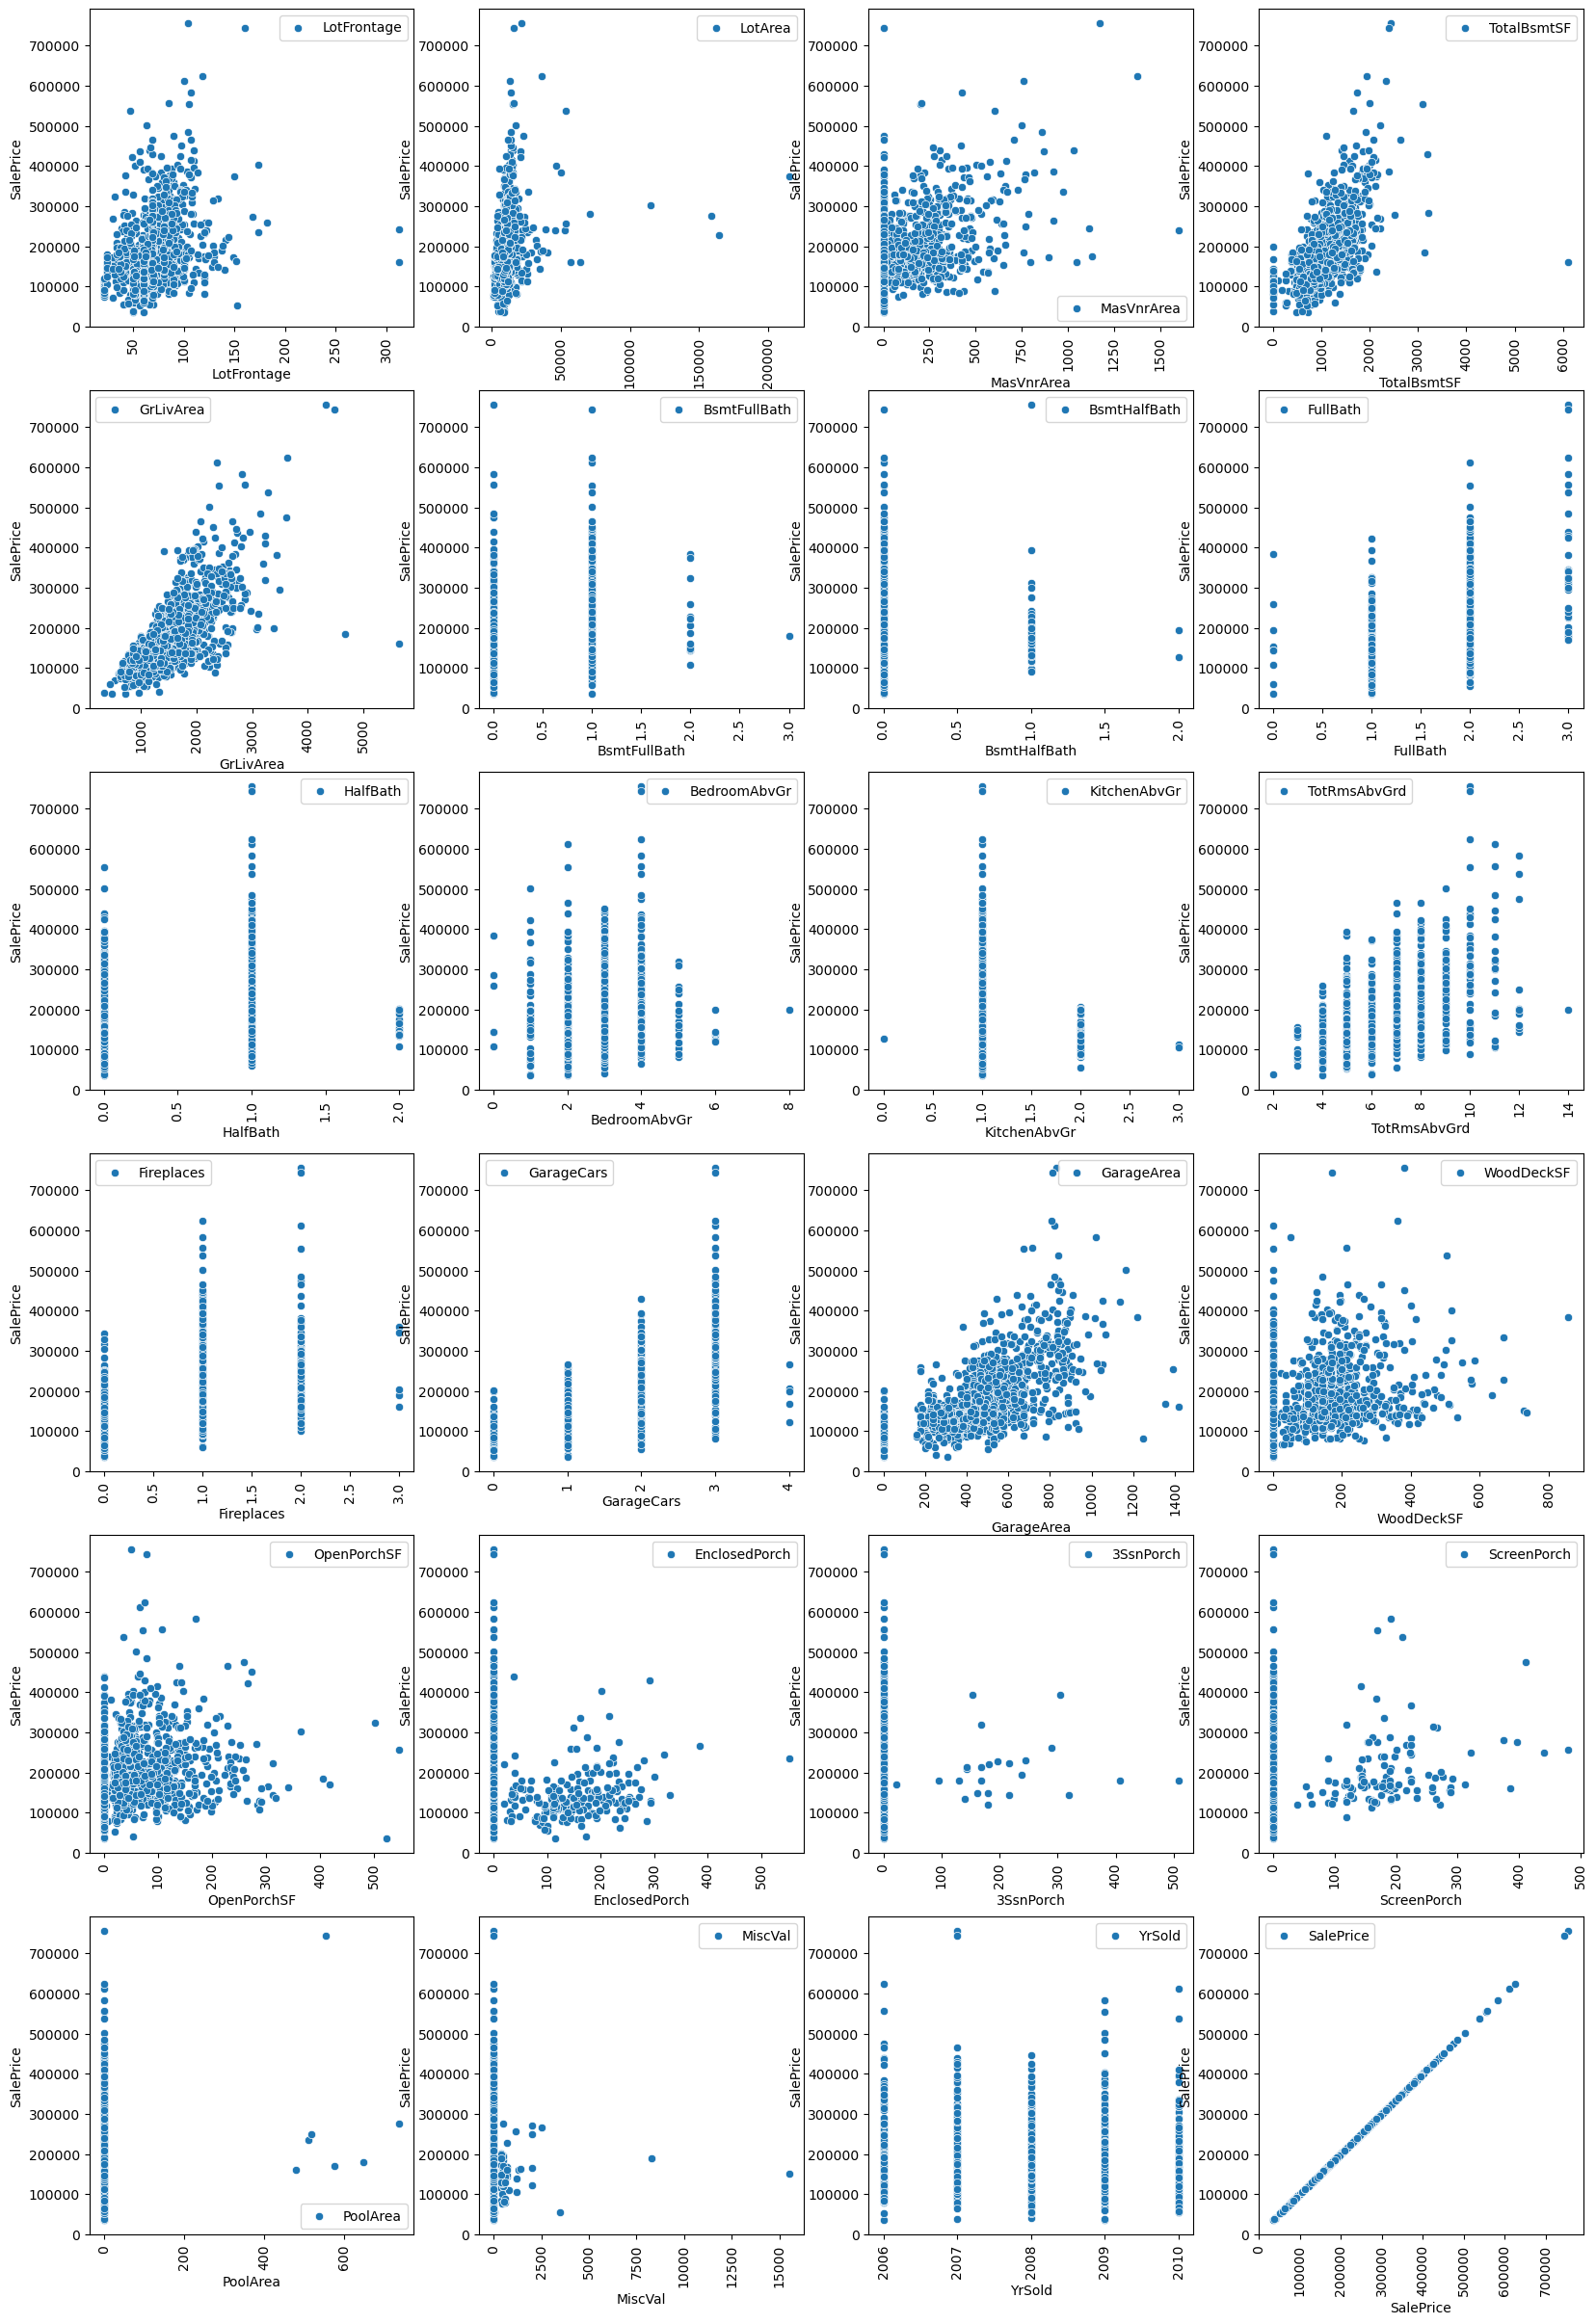

In [786]:
plt.figure(figsize=(20,30))
for i in enumerate(housing_num.columns):
    plt.subplot(6,4,i[0]+1)
    sns.scatterplot(x=i[1], y= df_housing['SalePrice'], data=df_housing, label= i[1])
    x=plt.xticks(rotation=90)

In [787]:
# finding unique values present in the numeric columns
for i, n in enumerate(housing_num.columns):
    print( 'count of unique values: ', n) 
    print(housing_num[n].nunique() )
    #unique, counts = np.unique(df_housing[n], return_counts=True)
    #print("unique",unique)
    #print("counts",counts)
    #print(round(df_housing[n].nunique().value_counts() / len(df_housing) *100 ,2))

count of unique values:  LotFrontage
110
count of unique values:  LotArea
1073
count of unique values:  MasVnrArea
327
count of unique values:  TotalBsmtSF
721
count of unique values:  GrLivArea
861
count of unique values:  BsmtFullBath
4
count of unique values:  BsmtHalfBath
3
count of unique values:  FullBath
4
count of unique values:  HalfBath
3
count of unique values:  BedroomAbvGr
8
count of unique values:  KitchenAbvGr
4
count of unique values:  TotRmsAbvGrd
12
count of unique values:  Fireplaces
4
count of unique values:  GarageCars
5
count of unique values:  GarageArea
441
count of unique values:  WoodDeckSF
274
count of unique values:  OpenPorchSF
202
count of unique values:  EnclosedPorch
120
count of unique values:  3SsnPorch
20
count of unique values:  ScreenPorch
76
count of unique values:  PoolArea
8
count of unique values:  MiscVal
21
count of unique values:  YrSold
5
count of unique values:  SalePrice
663


##### 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd' , 'Fireplaces' , 'GarageCars', 'PoolArea', 'YrSold'columns to be checked for their distribution of values and variance. Those columns with 10% or less variance (90% or more unique values place in records will be dropped)

In [788]:
x = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath' ,
 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd' , 'Fireplaces' , 'GarageCars', 'PoolArea' , 'YrSold']


for i, n in enumerate(x):
    print('Count and Pcnt of unique values of :' , n , housing_num[n].nunique())
    print(round(housing_num[n].value_counts()/len(housing_num)*100, 2))

Count and Pcnt of unique values of : BsmtFullBath 4
BsmtFullBath
0    58.63
1    40.27
2     1.03
3     0.07
Name: count, dtype: float64
Count and Pcnt of unique values of : BsmtHalfBath 3
BsmtHalfBath
0    94.38
1     5.48
2     0.14
Name: count, dtype: float64
Count and Pcnt of unique values of : FullBath 4
FullBath
2    52.60
1    44.52
3     2.26
0     0.62
Name: count, dtype: float64
Count and Pcnt of unique values of : HalfBath 3
HalfBath
0    62.53
1    36.64
2     0.82
Name: count, dtype: float64
Count and Pcnt of unique values of : BedroomAbvGr 8
BedroomAbvGr
3    55.07
2    24.52
4    14.59
1     3.42
5     1.44
6     0.48
0     0.41
8     0.07
Name: count, dtype: float64
Count and Pcnt of unique values of : KitchenAbvGr 4
KitchenAbvGr
1    95.34
2     4.45
3     0.14
0     0.07
Name: count, dtype: float64
Count and Pcnt of unique values of : TotRmsAbvGrd 12
TotRmsAbvGrd
6     27.53
7     22.53
5     18.84
8     12.81
4      6.64
9      5.14
10     3.22
11     1.23
3      1.1

In [789]:
## Dropping cols - 'BsmtHalfBath', 'KitchenAbvGr', 'PoolArea'  as they have less variance as seen above
df_housing.drop (['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea'], inplace = True, axis = 1)

In [790]:
## Clubbing the categories of less percentage of values to Other in columns like 'BsmtFullBath' [2 and 3 to Other]  , 'FullBath' [ 0 and 3 to Other]
## 'HalfBath' [2 to Other], 'BedroomAbvGr' [0,1,5,6,8 to Other], 'TotRmsAbvGrd' [4,9,10,11,3,12,2,14 to Other] , 'Fireplaces' [2,3 to Other], 
## 'GarageCars' [0, 4 to Other]

df_housing['BsmtFullBath'] = df_housing['BsmtFullBath'].apply(lambda x : 'other' if x in [2,3] else x)
print(df_housing['BsmtFullBath'].unique())

df_housing['FullBath'] = df_housing['FullBath'].apply(lambda x : 'other' if x in [0,3] else x)
print(df_housing['FullBath'].unique())

df_housing['HalfBath'] = df_housing['HalfBath'].apply(lambda x : 'other' if x in [2] else x)
print(df_housing['HalfBath'].unique())

df_housing['BedroomAbvGr'] = df_housing['BedroomAbvGr'].apply(lambda x : 'other' if x in [0,1,5,6,8] else x)
print(df_housing['BedroomAbvGr'].unique())

df_housing['TotRmsAbvGrd'] = df_housing['TotRmsAbvGrd'].apply(lambda x : 'other' if x in [4,9,10,11,3,12,2,14] else x)
print(df_housing['TotRmsAbvGrd'].unique())

df_housing['Fireplaces'] = df_housing['Fireplaces'].apply(lambda x : 'other' if x in [2,3] else x)
print(df_housing['Fireplaces'].unique())

df_housing['GarageCars'] = df_housing['GarageCars'].apply(lambda x : 'other' if x in [0, 4 ] else x)
print(df_housing['GarageCars'].unique())

[1 0 'other']
[2 1 'other']
[1 0 'other']
[3 4 'other' 2]
[8 6 7 'other' 5]
[0 1 'other']
[2 3 1 'other']


In [791]:
num_cols(df_housing).columns

(1460, 14)


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

#### Finding Correlation between numeric columns

(1460, 14)


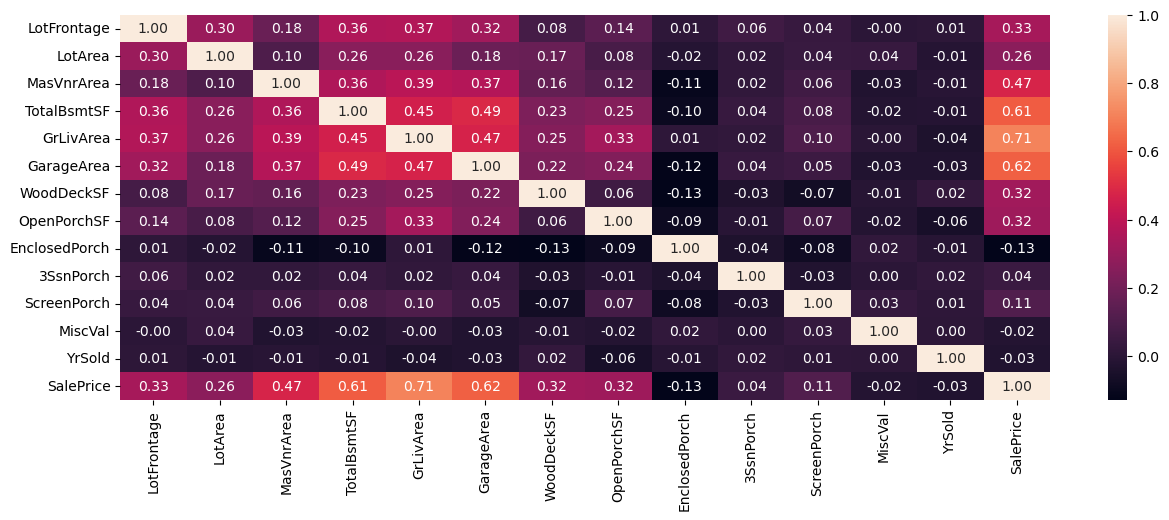

In [792]:
plt.figure(figsize = (15,5))
sns.heatmap(num_cols(df_housing).corr(), annot = True, fmt = '.2f')
plt.show()

From the above Heatmap, we can see SalePrice is higher for the house with higher Ground Floor Living Area, Total Area of the Basement, GarageArea.


##### Exploring Categorical columns

In [793]:
##### updating the categorical columns dataframe for analysis
cat_cols(df_housing).columns

(1460, 50)


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'YearBuilt_bnd', 'YearRemodAdd_bnd',
       'GarageYrBlt_bnd'],
      dtype='object')

In [794]:
for i, n in enumerate(cat_cols(df_housing).columns):
    print('Count and Pcnt of unique values of :' , n , df_housing[n].nunique())
    print(round(df_housing[n].value_counts()/len(df_housing)*100, 2))

(1460, 50)
Count and Pcnt of unique values of : MSSubClass 15
MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          36.71
2-STORY 1946 & NEWER                                     20.48
1-1/2 STORY FINISHED ALL AGES                             9.86
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     5.96
1-STORY 1945 & OLDER                                      4.73
2-STORY PUD - 1946 & NEWER                                4.32
2-STORY 1945 & OLDER                                      4.11
SPLIT OR MULTI-LEVEL                                      3.97
DUPLEX - ALL STYLES AND AGES                              3.56
2 FAMILY CONVERSION - ALL STYLES AND AGES                 2.05
SPLIT FOYER                                               1.37
2-1/2 STORY ALL AGES                                      1.10
1-1/2 STORY - UNFINISHED ALL AGES                         0.82
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   0.68
1-STORY W/FINISHED ATTIC ALL AGES            

In [795]:
### Dropping the Columns with less variance as categorical columns, columns where more than 90% of the records are same, those are dropped.
df_housing.drop (['Street','Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PavedDrive' , 'Electrical',
                 'CentralAir', 'Functional'], inplace = True, axis =1 )
df_housing.shape

(1460, 55)

##### Clubbing those categories in the Columns as 'other' whose percentage of total records is less than 10%

In [796]:
l = ['SaleCondition','SaleType','GarageCond', 'GarageQual', 'GarageType', 'KitchenQual', 'HeatingQC', 'BsmtFinType2', 'BsmtFinType1',
    'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd', 'Exterior1st', 'RoofStyle', 'OverallCond',
    'OverallQual', 'HouseStyle', 'BldgType', 'Condition1', 'Neighborhood', 'LotConfig', 'LandContour', 'LotShape', 'MSZoning', 'MSSubClass' ]
def findValGtTh(df_housing):
    for i in l:
       df = pd.DataFrame(df_housing[i].value_counts()/len(df_housing)*100)
       li = df[df['count']<10].index 
       df_housing[i] = df_housing[i].apply(lambda x : 'other' if x in li else x)

findValGtTh(df_housing)

In [797]:
df_housing.shape

(1460, 55)

In [798]:
cat_cols(df_housing).columns

(1460, 41)


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition',
       'YearBuilt_bnd', 'YearRemodAdd_bnd', 'GarageYrBlt_bnd'],
      dtype='object')

#### Creating Dummy Variables

In [799]:
df_dummy = pd.get_dummies(cat_cols(df_housing), drop_first = True, dtype = int)
df_housing = pd.concat([df_housing, df_dummy], axis = 1)
df_housing.drop(cat_cols(df_housing), inplace = True, axis = 1)
df_housing.shape

(1460, 41)
(1460, 41)


(1460, 110)

In [800]:
df_housing.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       ...
       'YearBuilt_bnd_1960-1989', 'YearBuilt_bnd_1990-2000',
       'YearBuilt_bnd_2001-2010', 'YearRemodAdd_bnd_1960-1989',
       'YearRemodAdd_bnd_1990-2000', 'YearRemodAdd_bnd_2001-2010',
       'GarageYrBlt_bnd_1930-1959', 'GarageYrBlt_bnd_1960-1989',
       'GarageYrBlt_bnd_1990-2000', 'GarageYrBlt_bnd_2001-2010'],
      dtype='object', length=110)

#### Train - Test Splitting of Data

In [801]:
df_train, df_test = train_test_split(df_housing, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1021, 110)
(439, 110)


In [802]:
y_train = df_train.pop('SalePrice')
x_train = df_train

In [803]:
print(y_train.shape)
print(x_train.shape )

(1021,)
(1021, 109)


In [804]:
y_test = df_test.pop('SalePrice')
x_test = df_test

print(y_test.shape)
print(x_test.shape)

(439,)
(439, 109)


### Scaling the data

In [805]:
scaler = MinMaxScaler()
xt = num_cols(df_train).columns
df_train[xt] = scaler.fit_transform(df_train[xt])

(1021, 13)


#### Scaling the Test set of the data by transforming them as per the train data

In [806]:
df_test[xt] = scaler.transform(df_test[xt])

In [807]:
df_test.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,YearBuilt_bnd_1960-1989,YearBuilt_bnd_1990-2000,YearBuilt_bnd_2001-2010,YearRemodAdd_bnd_1960-1989,YearRemodAdd_bnd_1990-2000,YearRemodAdd_bnd_2001-2010,GarageYrBlt_bnd_1930-1959,GarageYrBlt_bnd_1960-1989,GarageYrBlt_bnd_1990-2000,GarageYrBlt_bnd_2001-2010
1436,0.133562,0.035192,0.00000,0.141408,0.081860,0.372355,0.000000,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
57,0.232877,0.047566,0.00000,0.140753,0.246349,0.398449,0.000000,0.133843,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
780,0.143836,0.029930,0.02375,0.202455,0.156610,0.283498,0.256709,0.040153,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
382,0.198630,0.036338,0.00000,0.153682,0.261145,0.450635,0.168028,0.101338,0.0,0.0,...,0,0,1,0,0,1,0,0,0,1
1170,0.188356,0.039309,0.00000,0.179378,0.130669,0.252468,0.236873,0.000000,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0


## Ridge Regression

In [808]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [809]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 7.0}


In [869]:
alpha = 7.0

ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)

print('Coefficients of Ridge Regression after doubling the Alpha : ', len (ridge.coef_))
print('\n',ridge.coef_)

Coefficients of Ridge Regression after doubling the Alpha :  109

 [   516.35262478  24633.5457006   29796.99506294  45774.21868788
  80310.95773526  21447.89086888  18894.71767347   6642.26680931
   4402.69694492  10552.62500862  11085.97232492  -1973.41745025
  -4368.29323202 -13982.39250461  -9573.2287367   -6442.29403376
  -4107.60953643  -2810.18719718    875.03756147  -5698.15829565
  -1688.29471057   4917.27536519  11194.30765759    550.05395714
   5849.27514295   7282.49627935 -11681.42475045 -10866.95793911
 -10250.58486147  -1138.76154369  -9556.66474122   -358.12847445
   8344.39504367  22983.65005676   3938.95258934  -8451.37293372
   3198.35827775  -9718.32336165   4002.34060476   8350.78129099
  -2007.03798004    584.03047347   8009.63671327   6603.58595403
   3480.64196455   2288.93982901  -3974.59689499  -4238.71245125
 -13372.1944331   18644.09101043  -1416.44951479  -5844.84356741
  -1071.77970506   2986.96246553 -12076.94875199   2758.15025498
  21050.62794416 -11833

In [867]:
# doubling the alpha value and reruning the Ridge Regression

alpha = 14

ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
print('Coefficients of Ridge Regression after doubling the Alpha : ', len (ridge.coef_))
print('\n', ridge.coef_)

Coefficients of Ridge Regression after doubling the Alpha :  109

 [ 4.31357311e+03  1.55571508e+04  2.52562014e+04  3.26378601e+04
  5.44442536e+04  2.16461985e+04  1.69517296e+04  7.25028867e+03
  3.14965112e+03  6.37947909e+03  9.07469361e+03 -1.40683738e+03
 -4.59010687e+03 -1.12277083e+04 -9.06356114e+03 -6.24081957e+03
 -4.29513969e+03 -3.39425286e+03  8.99742212e+02 -3.86407562e+03
 -1.89935737e+03  4.23067881e+03  9.16536533e+03  1.53531625e+03
  5.15206373e+03  7.08228034e+03 -1.04960640e+04 -1.07016566e+04
 -8.73404285e+03 -8.33119276e+02 -8.31108981e+03 -1.03320321e+03
  7.61026886e+03  2.20545621e+04  3.70797219e+03 -7.61113238e+03
  3.28472330e+03 -8.67055252e+03  5.79038933e+03  7.01439988e+03
 -8.52083148e+02 -1.35387660e+02  5.92724470e+03  5.75631531e+03
  2.17905445e+03  1.99724055e+03 -1.87810840e+03 -2.81148454e+03
 -1.37923420e+04  1.85933951e+04 -1.50597287e+03 -5.05567789e+03
 -4.56288423e+01  3.89397798e+03 -1.00134089e+04  2.30513622e+03
  2.04765187e+04 -1.171

In [811]:
# Finding the Error with alpha = 0.7 in Ridge Regression

y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

print('Ridge Regression')
r2_score_train = r2_score(y_train, y_train_pred_ridge)
print('R_sqaured_train = ', r2_score_train)

mse_train = mean_squared_error(y_train, y_train_pred_ridge)
print('RMSE_train = ', mse_train**0.5)

rss_train = np.sum(np.square(y_train - y_train_pred_ridge))
print('RSS_train = ', rss_train)

r2_score_test = r2_score(y_test, y_test_pred_ridge)
print('R_sqaured_test = ', r2_score_test)

mse_test = mean_squared_error(y_test, y_test_pred_ridge)
print('RMSE_test = ', mse_test**0.5)

rss_test = np.sum(np.square(y_test - y_test_pred_ridge))
print('RSS_test = ', rss_test)

Ridge Regression
R_sqaured_train =  0.8308792617289692
RMSE_train =  32513.152365668306
RSS_train =  1079304283364.979
R_sqaured_test =  0.8281194605602018
RMSE_test =  33261.82326672065
RSS_test =  485687161404.65936


### Lasso Regression

In [812]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 500}


In [864]:

alpha = 500

# Printing the best hyperparameter alpha
print(alpha)

lasso = Lasso(alpha = alpha)
lasso.fit(x_train, y_train)
print('Number of Coefficients of Lasso Regression after doubling the Alpha : ', len(lasso.coef_[lasso.coef_ > 0]))
print('\n', lasso.coef_)
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)


500
Number of Coefficients of Lasso Regression after doubling the Alpha :  28

 [     0.              0.           9256.99999421   5594.8516466
 209086.78006562      0.           3136.80430191      0.
     -0.              0.              0.             -0.
     -0.             -0.          -9390.81088955  -5184.0194062
     -0.          -3124.61199052      0.             -0.
   -408.69502588   3747.17522605      0.              0.
     -0.           3015.5420768  -10624.14281256  -5575.51895449
   1372.18796368     -0.             -0.           -327.05367468
   1690.09645291  14508.23226097      0.          -1412.15282436
   1495.70371922  -2723.23652847   2999.42262347      0.
      0.             -0.              0.              0.
      0.              0.             -0.             -0.
 -14565.97142639  12285.38755557     -0.             -0.
      0.           4489.44421855     -0.             -0.
  15909.36888519 -11982.17588703  -5517.55999043   5160.84419588
     -0.          1

In [870]:
# doubling the alpha value and reruning the Ridge Regression

alpha = 1000

# Printing the best hyperparameter alpha
print(alpha)

lasso = Lasso(alpha = alpha)
lasso.fit(x_train, y_train)
print('Number of Coefficients of Lasso Regression after doubling the Alpha : ', len(lasso.coef_[lasso.coef_ > 0]))
print('\n', lasso.coef_)
y_train_pred_lasso = lasso.predict(x_train)
y_test_pred_lasso = lasso.predict(x_test)

1000
Number of Coefficients of Lasso Regression after doubling the Alpha :  21

 [     0.              0.              0.              0.
 149755.41961824      0.              0.              0.
     -0.              0.              0.             -0.
     -0.              0.         -14082.11158688  -2886.62653186
     -0.          -4835.63063649      0.              0.
     -0.              0.              0.              0.
     -0.            903.02481621  -4683.53551859     -0.
      0.             -0.              0.             -0.
      0.          10472.69757946      0.             -0.
      0.             -0.           4519.34555249      0.
     -0.              0.             -0.              0.
      0.              0.             -0.             -0.
 -19030.19819808   5099.85383563     -0.             -0.
     -0.           5776.90262018     -0.             -0.
  15420.89697798  -7476.6798752   -6433.74985722   2437.11230447
     -0.          18110.21774636     -0.        

In [820]:
# Finding the error with alpha = 500 for Lasso Regression

print('lasso Regression')
r2_score_train = r2_score(y_train, y_train_pred_lasso)
print('R_sqaured_train = ', r2_score_train)

mse_train = mean_squared_error(y_train, y_train_pred_lasso)
print('RMSE_train = ', mse_train**0.5)

rss_train = np.sum(np.square(y_train - y_train_pred_lasso))
print('RSS_train = ', rss_train)

r2_score_test = r2_score(y_test, y_test_pred_lasso)
print('R_sqaured_test = ', r2_score_test)

mse_test = mean_squared_error(y_test, y_test_pred_lasso)
print('RMSE_test = ', mse_test**0.5)

rss_test = np.sum(np.square(y_test - y_test_pred_lasso))
print('RSS_test = ', rss_test)

lasso Regression
R_sqaured_train =  0.8189632524903658
RMSE_train =  33639.072712323534
RSS_train =  1155350544416.8345
R_sqaured_test =  0.8115977948455891
RMSE_test =  34823.762197733195
RSS_test =  532372847572.27515


In [821]:
betas = pd.DataFrame(index=x_train.columns)

In [822]:
betas.rows = x_train.columns

In [871]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [872]:
pd.set_option('display.max_rows', None)
betas.head(110)

,Ridge,Lasso
LotFrontage,516.352625,0.000000
LotArea,24633.545701,0.000000
MasVnrArea,29796.995063,0.000000
TotalBsmtSF,45774.218688,0.000000
GrLivArea,80310.957735,149755.419618
GarageArea,21447.890869,0.000000
WoodDeckSF,18894.717673,0.000000
OpenPorchSF,6642.266809,0.000000
EnclosedPorch,4402.696945,-0.000000
3SsnPorch,10552.625009,0.000000


In [873]:
print(betas[betas['Lasso'] > 0.000])
print('Total number of Co-efficient in Lasso regression: ', len(betas[betas['Lasso'] > 0.000]))

                                   Ridge          Lasso
GrLivArea                   80310.957735  149755.419618
Neighborhood_other           7282.496279     903.024816
OverallQual_Very Good       22983.650057   10472.697579
RoofStyle_Hip                4002.340605    4519.345552
ExterQual_other             18644.091010    5099.853836
Foundation_PConc             2986.962466    5776.902620
BsmtQual_other              21050.627944   15420.896978
BsmtExposure_other           7786.254010    2437.112304
BsmtFinType1_GLQ            11657.594594   18110.217746
BsmtFullBath_1               6403.831820    5843.506369
FullBath_2                   7191.682788    1253.136389
FullBath_other              43902.332670   19218.717532
HalfBath_1                   8401.388167    6938.281961
BedroomAbvGr_4              16071.288062    5101.538445
KitchenQual_other           23618.294069   13632.656378
Fireplaces_1                13029.484644   15554.430750
Fireplaces_other            33130.067070   33440

In [874]:
betas_lasso = betas[betas['Lasso'] > 0.000]
betas_lasso.sort_values('Lasso', ascending = False, inplace = True)
betas_lasso

,Ridge,Lasso
GrLivArea,80310.957735,149755.419618
GarageCars_3,36218.507010,50925.844648
Fireplaces_other,33130.067070,33440.273445
FullBath_other,43902.332670,19218.717532
BsmtFinType1_GLQ,11657.594594,18110.217746
Fireplaces_1,13029.484644,15554.430750
BsmtQual_other,21050.627944,15420.896978
KitchenQual_other,23618.294069,13632.656378
OverallQual_Very Good,22983.650057,10472.697579
HalfBath_1,8401.388167,6938.281961


Dropping top five significant variables from previous run (when alpha = 500 in Lasso) and re-running the Lasso to extract top five significant variables again.
The top five significant features ['GrLivArea', 'GarageCars_3', 'Fireplaces_other', 'FullBath_other', 'KitchenQual_other']

In [837]:
x_train_next_lasso = x_train.drop(['GrLivArea', 'GarageCars_3', 'Fireplaces_other', 'FullBath_other', 'KitchenQual_other'], axis = 1)

In [838]:
x_train_next_lasso.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',
       ...
       'YearBuilt_bnd_1960-1989', 'YearBuilt_bnd_1990-2000',
       'YearBuilt_bnd_2001-2010', 'YearRemodAdd_bnd_1960-1989',
       'YearRemodAdd_bnd_1990-2000', 'YearRemodAdd_bnd_2001-2010',
       'GarageYrBlt_bnd_1930-1959', 'GarageYrBlt_bnd_1960-1989',
       'GarageYrBlt_bnd_1990-2000', 'GarageYrBlt_bnd_2001-2010'],
      dtype='object', length=104)

In [839]:
x_test_next_lasso = x_test.drop(['GrLivArea', 'GarageCars_3', 'Fireplaces_other', 'FullBath_other', 'KitchenQual_other'], axis = 1)

In [850]:
x_test_next_lasso.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch',
       ...
       'YearBuilt_bnd_1960-1989', 'YearBuilt_bnd_1990-2000',
       'YearBuilt_bnd_2001-2010', 'YearRemodAdd_bnd_1960-1989',
       'YearRemodAdd_bnd_1990-2000', 'YearRemodAdd_bnd_2001-2010',
       'GarageYrBlt_bnd_1930-1959', 'GarageYrBlt_bnd_1960-1989',
       'GarageYrBlt_bnd_1990-2000', 'GarageYrBlt_bnd_2001-2010'],
      dtype='object', length=104)

In [841]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train_next_lasso, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 500}


In [842]:
alpha = 500

# Printing the best hyperparameter alpha
print(alpha)

lasso = Lasso(alpha = alpha)
lasso.fit(x_train_next_lasso, y_train)
print(lasso.coef_)
y_train_pred_lasso = lasso.predict(x_train_next_lasso)
y_test_pred_lasso = lasso.predict(x_test_next_lasso)


500
[     0.              0.          34145.36211357 179139.84166216
  76644.68651277  14426.65561803      0.             -0.
      0.              0.             -0.          -3169.90265729
      0.          -9779.53045803  -5269.78699022     -0.
  -4940.80490176     -0.              0.          -1140.45340771
      0.              0.              0.             -0.
   6850.94437112  -6996.77168611  -9999.73515159  -9058.49469889
    376.02559429     -0.          -3401.12905599   7037.80574761
  21694.66939762      0.          -2059.40445036   2025.30623725
  -3264.61011247   5466.32378895      0.             -0.
      0.              0.           3291.59024886     -0.
      0.             -0.              0.         -14598.42078793
  25956.5036079      -0.             -0.             -0.
   2242.41993933     -0.             -0.          29221.12587843
  -6601.56116726  -3544.4187417    9977.15930635      0.
  13545.5170154    -557.49680501  -2167.55985622     -0.
  -2854.77230238   -

In [843]:
betas_next_lasso = pd.DataFrame(index=x_train_next_lasso.columns)

In [844]:
betas_next_lasso.rows = x_train_next_lasso.columns

In [845]:
betas_next_lasso['post_5_drop_Lasso'] = lasso.coef_

In [849]:
betas_next_lasso = betas_next_lasso[betas_next_lasso['post_5_drop_Lasso'] > 0.000]
betas_next_lasso.sort_values('post_5_drop_Lasso', ascending = False, inplace = True)
print(len(betas_next_lasso))
betas_next_lasso

25


,post_5_drop_Lasso
TotalBsmtSF,179139.841662
GarageArea,76644.686513
MasVnrArea,34145.362114
BsmtQual_other,29221.125878
ExterQual_other,25956.503608
OverallQual_Very Good,21694.669398
BedroomAbvGr_4,21067.061013
HalfBath_1,14441.930296
WoodDeckSF,14426.655618
YearRemodAdd_bnd_1990-2000,14137.044422
